# Telecom Customer Churn Prediction- tilte of the project

Problem Statement:
    Customer churn leads to revenue loss in telecom companies.
The goal of this project is to build a machine learning model that predicts whether a customer is likely to churn based on their usage and recharge behavior.

Dataset

Source: Public telecom churn dataset from GitHub

Rows: ~1 lakh,~226 columns

Columns: Call usage, data usage, recharge, ARPU, tenure, etc.

Target variable: churn (1 = churn, 0 = not churn)

Churn is defined as:

Customer with zero outgoing calls, zero incoming calls and zero data usage in the last month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
drop_cols = [
    'mobile_number',
    'last_date_of_month_6','last_date_of_month_7',
    'last_date_of_month_8','last_date_of_month_9',
    'date_of_last_rech_6','date_of_last_rech_7',
    'date_of_last_rech_8','date_of_last_rech_9',
    'date_of_last_rech_data_6','date_of_last_rech_data_7',
    'date_of_last_rech_data_8','date_of_last_rech_data_9'
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [5]:
df.isnull().sum().head(20)

circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
arpu_6               0
arpu_7               0
arpu_8               0
arpu_9               0
onnet_mou_6       3937
onnet_mou_7       3859
onnet_mou_8       5378
onnet_mou_9       7745
offnet_mou_6      3937
offnet_mou_7      3859
offnet_mou_8      5378
offnet_mou_9      7745
roam_ic_mou_6     3937
roam_ic_mou_7     3859
roam_ic_mou_8     5378
roam_ic_mou_9     7745
dtype: int64

In [7]:
df.fillna(0,inplace=True)

Create CHURN column

In [8]:
df['churn'] = ((df['total_og_mou_9'] == 0) & 
               (df['total_ic_mou_9'] == 0) & 
               (df['vol_2g_mb_9'] == 0) & 
               (df['vol_3g_mb_9'] == 0)).astype(int)

df['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

Remove month 9 columns

In [9]:
cols_to_remove = [col for col in df.columns if col.endswith('_9')]
df.drop(columns=cols_to_remove, inplace=True)

Feature Engineering

In [11]:
df['avg_arpu'] = df[['arpu_6','arpu_7','arpu_8']].mean(axis=1)
df['avg_onnet'] = df[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].mean(axis=1)
df['avg_offnet'] = df[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].mean(axis=1)
df['avg_data'] = df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
                      'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].sum(axis=1)

Prepare X and y

In [12]:
X = df.drop('churn', axis=1)
y = df['churn']

Train-test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Train model (Logistic Regression)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Evaluate model

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22184   219]
 [ 2044   553]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     22403
           1       0.72      0.21      0.33      2597

    accuracy                           0.91     25000
   macro avg       0.82      0.60      0.64     25000
weighted avg       0.89      0.91      0.89     25000



Try Random Forest (better accuracy)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22403
           1       0.79      0.58      0.67      2597

    accuracy                           0.94     25000
   macro avg       0.87      0.78      0.82     25000
weighted avg       0.94      0.94      0.94     25000



Important Features

In [18]:
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=False).head(10)

loc_ic_mou_8        0.083170
total_ic_mou_8      0.073061
loc_og_mou_8        0.041743
loc_ic_t2m_mou_8    0.040821
total_og_mou_8      0.033157
loc_og_t2m_mou_8    0.026504
arpu_8              0.022076
loc_ic_t2t_mou_8    0.020456
offnet_mou_8        0.017886
total_rech_amt_8    0.017270
dtype: float64

EDA (Exploratory Data Analysis)

Who is churning?

Why they are churning?

Which features differ between churn vs non-churn?

Churn distribution

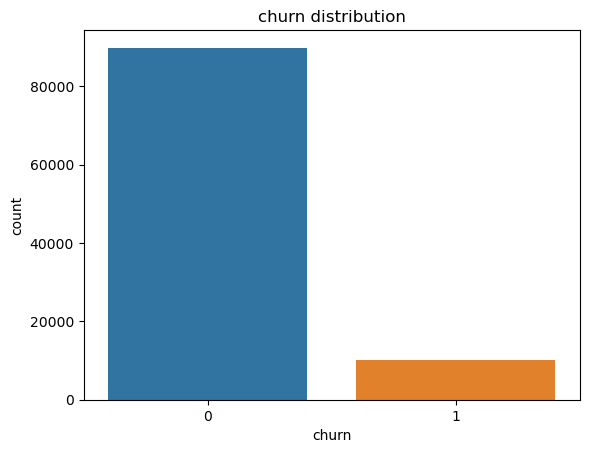

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn',data=df)
plt.title("churn distribution")
plt.show()

Dataset is imbalanced with fewer churn customers compared to non-churn.

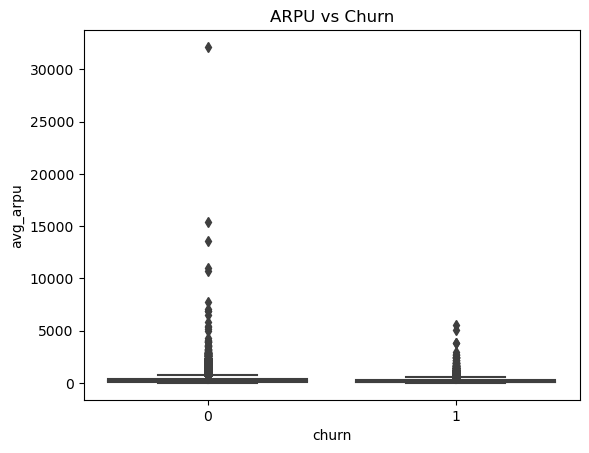

In [21]:
sns.boxplot(x='churn', y='avg_arpu', data=df)
plt.title("ARPU vs Churn")
plt.show()

Churn customers have lower average revenue than retained customers.

Data usage vs churn

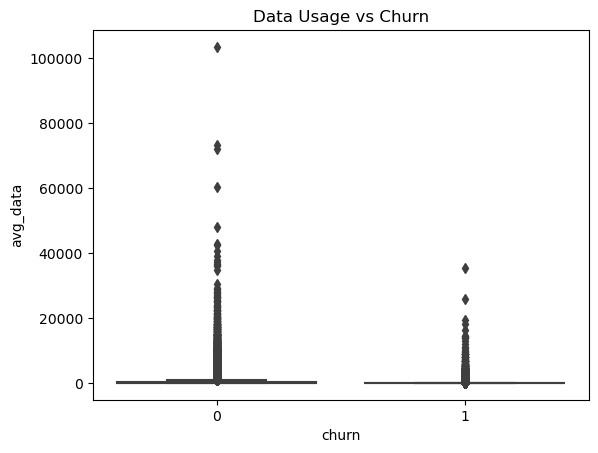

In [22]:
sns.boxplot(x='churn', y='avg_data', data=df)
plt.title("Data Usage vs Churn")
plt.show()

Low data usage customers are more likely to churn.

Tenure (aon) vs churn

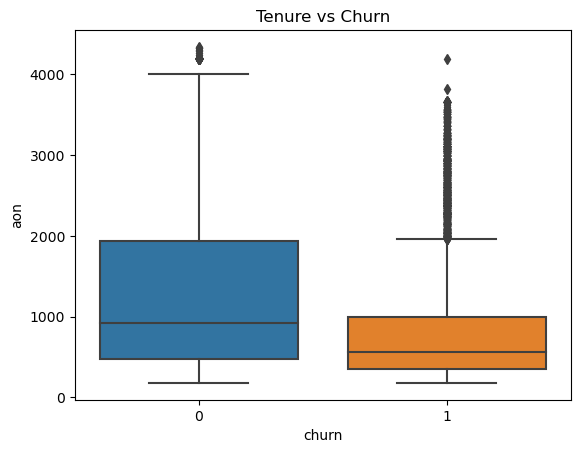

In [24]:
sns.boxplot(x='churn', y='aon', data=df)
plt.title("Tenure vs Churn")
plt.show()

Newer customers show higher churn tendency.

Correlation heatmap

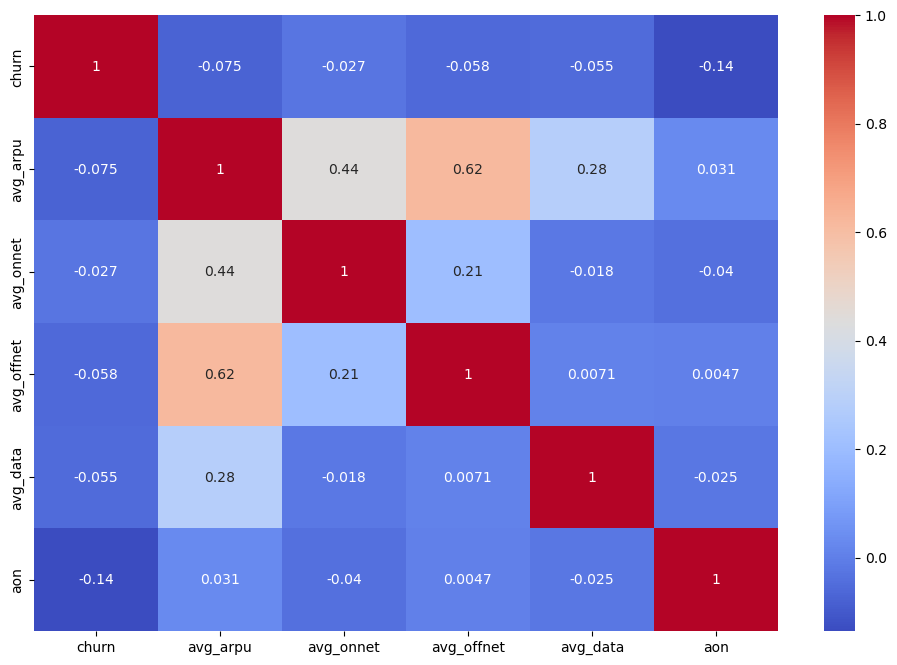

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['churn','avg_arpu','avg_onnet','avg_offnet','avg_data','aon']].corr(),
            annot=True, cmap='coolwarm')
plt.show()

Churn is negatively correlated with ARPU and tenure.

Handle Class Imbalance

SMOTE mehthod

In [31]:
!pip uninstall imbalanced-learn -y
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.10.1

Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 825, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\imbalanced_learn-0.10.1.dist-info\\' -> 'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-uninstall-2f7nt9mr'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\req\req_install.py", line 687, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "C:\ProgramData

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 825, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-1.3.0.dist-info\\' -> 'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-uninstall-thmg3ck7'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\req\req_install.py", line 687, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "C:\ProgramData\anac

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.3 MB 871.5 kB/s eta 0:00:10
   - -------------------------------------- 0.3/8.3 MB 1.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.3 MB 2.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.3 MB 2.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/8.3 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/8.3 MB 2.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/8.3 MB 2.5 MB/s eta 0:00:03
   ------ ---------------

In [32]:
from imblearn.over_sampling import SMOTE

X = df.drop('churn', axis=1)
y = df['churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y.value_counts())
print(y_res.value_counts())

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

Before:
0 = 22000
1 = 2600

After:
0 = 22000
1 = 22000

Balanced the dataset using SMOTE to improve churn detection.

Training  model again for updated thing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

Business Impact Simulation

Predicting churn probability

In [27]:
df['churn_prob'] = rf.predict_proba(X)[:,1]

Taking top risky customers

In [28]:
top_risky = df.sort_values('churn_prob', ascending=False).head(500)

Revenue that we saved form this process simulation

In [29]:
avg_arpu = df['avg_arpu'].mean()
saved_customers = int(0.1 * len(top_risky))  # 10% retention
revenue_saved = saved_customers * avg_arpu

revenue_saved

14011.312300122998

I performed EDA to identify churn patterns such as low ARPU, low data usage, and short tenure. I handled class imbalance using SMOTE to improve churn recall. Finally, I simulated business impact and showed how targeting high-risk customers could reduce revenue loss

This project focuses on predicting telecom customer churn. I cleaned and engineered features, performed EDA to understand churn patterns, built classification models, handled class imbalance using SMOTE, and evaluated models using precision and recall. I also identified key churn drivers and simulated business impact by estimating revenue savings from targeted retention strategies.